# Lebedev tests

In [2]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline



In [63]:
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})

In [70]:
pi2 = np.pi*2
sigdpp= 1.129E-4

def func_g2(g):
    return g/2
#     return 1-np.sqrt(1-g+g**2*0.5)


def lebfac(g,dq):
    g2 = func_g2(g)
#     return pi2**2*(1-g2)**2 / (pi2**2*(1-g2) + g2**2/(dq)**2)
    return pi2**2*(1-g2)**2*(dq)**2 / (pi2**2*(1-g2)*(dq)**2  + g2**2)
    

def anal_DJx(J,g2,Qp,sigdpp= 1.129E-4):
    dq = Qp*sigdpp*np.sqrt(2*J)
    a = pi2**2*(1-g2)**2*dq**2
    b = pi2**2*(1-g2)*dq**2
    c = g2**2
    return a/b*(1-1/np.sqrt(b/c+1))

def anal_DJx2(J,g2,Qp,sigdpp= 1.129E-4):
    return (1-g2)*(1-1/np.sqrt(1+2*pi2**2*(1-g2)/g2**2*Qp**2*sigdpp**2*J))

def dist(d,sigdpp=1.129e-4):
    return  1/(np.sqrt(2*np.pi)*sigdpp) * np.exp(-d**2/sigdpp**2*0.5)

def intQx(Jy,Jx,Qx0,a,b,exp):
    return Qx(Qx0,a,b,Jx,Jy)**(exp)*np.exp(-Jx-Jy)

def dQxOctu(Jx,Jy,a,b):
    return a*(Jx-1) + b*(Jy-1)

def octu_leb(Jx,Jy,a,b,g):
    dq = dQxOctu(Jx,Jy,a,b)
    return lebfac(g,dq)

def int_octu_leb(Jx,Jy,a,b,g):
    return octu_leb(Jx,Jy,a,b,g)*np.exp(-Jx-Jy)


[  4.93120565e-05   1.83740457e-04   6.83872995e-04   2.53496382e-03
   9.25972572e-03   3.22296529e-02   9.87055341e-02   2.39211825e-01
   4.38106570e-01   6.33183044e-01   7.79823066e-01   8.73152925e-01
   9.27143581e-01   9.56787768e-01   9.72617587e-01]


/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in exp
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


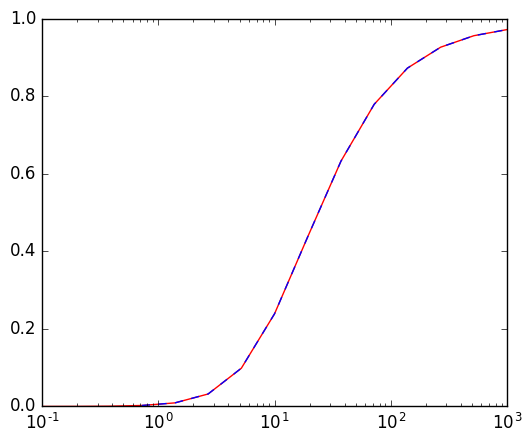

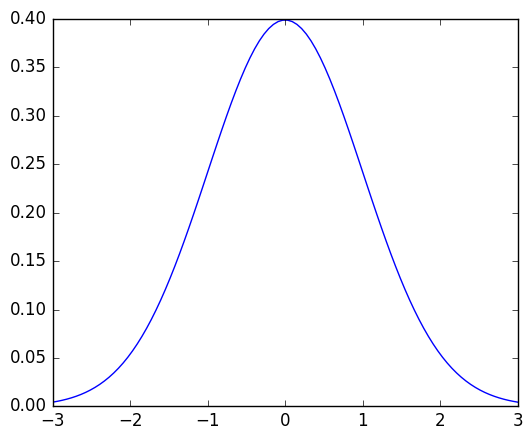

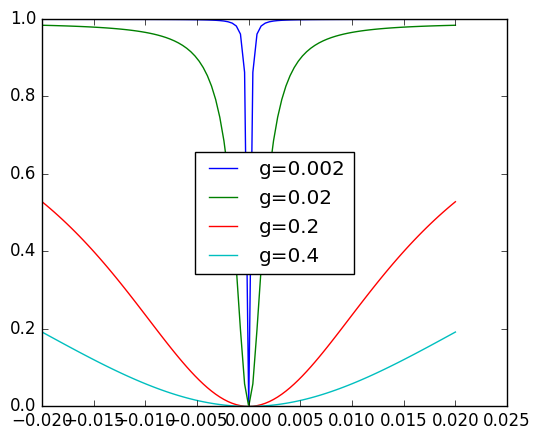

In [71]:
##################################################################
######### Temporary to look for error in my derivation ###########
##################################################################
PI = np.pi
sep = 1
g = 0.02
g2 = g/2


# Js = np.linspace(0.001,10,100)
# dq = Qp*sigdpp*np.sqrt(2*Js)
# dJ =0.5*sep**2

def rel_int2b(A,r=1):  # gaussian distriubiotn
    A = A*r
    fac4 = g2/(np.sqrt(2-2*g2)*A)
    return 1-g2 - (np.exp(fac4**2) * np.sqrt(1-g2)*g2*np.sqrt(PI*0.5) * spec.erfc(fac4)) / (A)


def integrand_chroma(d,g,Qp):
    return dist(d) * lebfac(g,d*Qp)

N=15
f_num = np.zeros(N)
f_anal= np.zeros(N)
Qps =  np.logspace(-1,3,N )
for i,Qp in enumerate(Qps ):
    f_num[i] = integrate.quad(integrand_chroma,-10*sigdpp,10*sigdpp,args=(g,Qp))[0]
#     f_num[i] = integrate.quad(dist,-np.inf,np.inf,args=())[0]
    f_anal[i]=rel_int2b(2*np.pi*sigdpp*Qp)
    
plt.figure()
plt.semilogx(Qps,f_num,'r')
plt.semilogx(Qps,f_anal,'b--')
print(f_num)

plt.figure()
x= np.linspace(-3,3,100)
plt.plot(x,dist(x,1))


plt.figure()
dq = 0.02
dqs = np.linspace(-dq,dq,101)

for g in [0.002,0.02,0.2,0.4]:
    plt.plot(dqs,lebfac(g,dqs),label = 'g='+str(g))
plt.legend(loc=0)

For a separation of 1
expect a emittance growth of 0.50
expect an action growth of   0.50
1.05025596858
0.569507195448
Integral 0.0004989415055184262
tau1 100.0


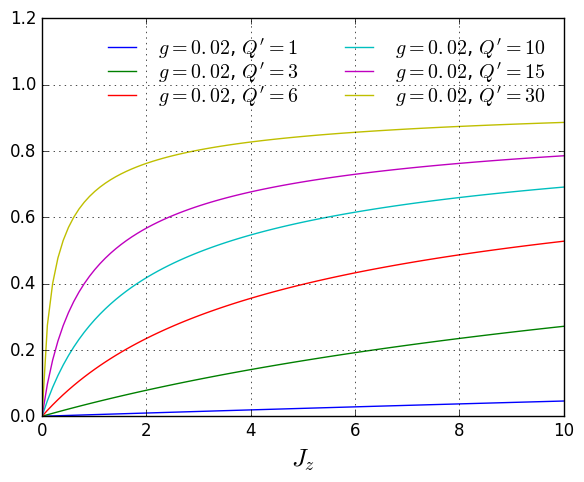

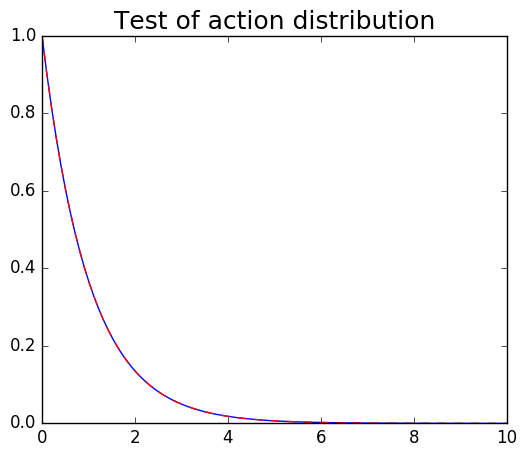

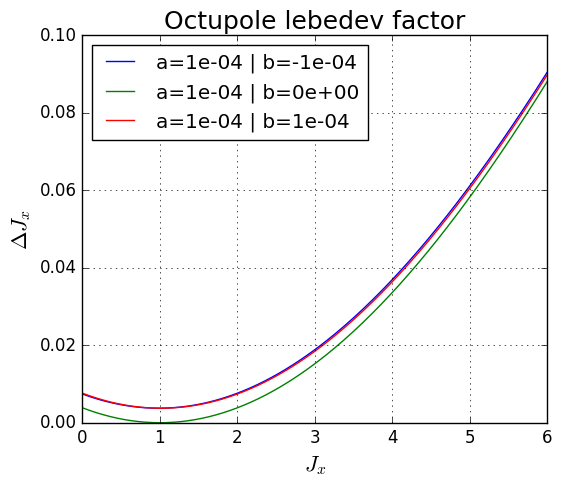

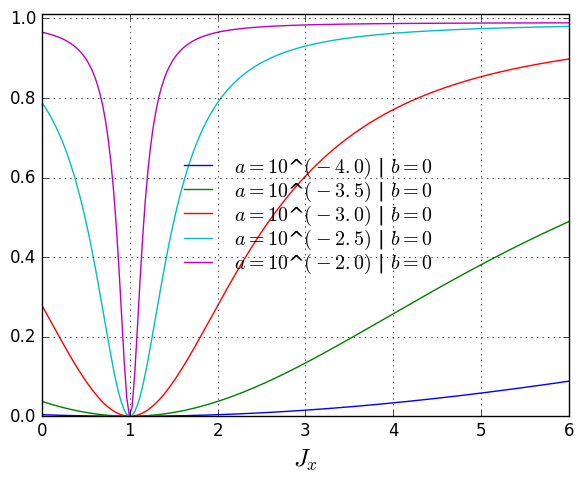

In [74]:
sep = 1
g = 0.02
g2 = func_g2(g)
Qp = 5
sigdpp= 1.129E-4
Js = np.linspace(0.001,10,100)
dq = Qp*sigdpp*np.sqrt(2*Js)
dJ =0.5*sep**2

# print(dq)

if False:
    plt.figure()
    plt.plot(Js,lebfac(g,dq))


def integrand(x,g,dqi):
    return lebfac(g,dqi*np.cos(x))/pi2

def integrand2(x,g,sig):
#     return lebfac(g,dQdJx*x)*st.chi2.pdf(x,2)
    return lebfac(g,x)*1/np.sqrt(2*np.pi*sig**2)*np.exp(-0.5*x**2/sig**2)

f1 = np.zeros_like(dq)
for i,dqi in enumerate(dq):
    f1[i]= integrate.quad(integrand, 0, pi2,args = (g,dqi))[0]
#     f1[i]= integrate.quad(integrand2, -np.inf, np.inf, args = (g,dqi/3))[0]





plt.figure()
# plt.plot(Js,f1*dJ,'r')
for Qpr in [1,3,6,10,15,30]:
#     f2 = anal_DJx(Js,g2,Qpr)
    f2 = anal_DJx2(Js,g2,Qpr)
    plt.plot(Js,f2,label=r'$g=%.2f$, $Q^\prime=%d$'%(g,Qpr))
#     plt.plot(Js,f2,'--',label=r'$g=%.2f$, $Q^\prime=%d$'%(g,Qpr))
plt.ylim(0,1.2)
plt.xlabel(r'$J_z$')
# plt.ylabel(r'$\Delta J_x$',fontsize=16)
# plt.title('Lebedev factor')
plt.legend(loc=0,frameon = False,
          columnspacing = 2,labelspacing = 0,ncol=2)
plt.grid(True)
plt.tight_layout()
plt.savefig('03_Plots/DACT_chroma_anal.eps')

# plt.savefig('DACT_j4_Qp%d'%Qp)
# plt.figure()
# f2 = np.cumsum(f)
# plt.plot(Js,f2)



print('For a separation of %d'%sep)
print('expect a emittance growth of %.2f'%(0.5*sep**2))
print('expect an action growth of   %.2f'%(0.5*sep**2))

def chi2_dist(J):
    return st.chi2.pdf(J*2,2)*2
dist= chi2_dist(Js)
plt.figure()
plt.plot(Js,dist)
plt.plot(Js,np.exp(-Js),'r--')
plt.title('Test of action distribution')
print(np.sum(dist)*np.diff(Js)[0])
print(np.sum(dist*f2)*np.diff(Js)[0])
def integrand(J):
    return chi2_dist(J)*anal_DJx(g2,J,Qp)
print('Integral',integrate.quad(integrand,0,20)[0])




#########################################################
#########################################################
# Octupole
g = 0.02
G = func_g2(g)
tau1=2/g
print('tau1',tau1)
a = 1e-4
b = -a
Jxmax = 6
Jx = np.linspace(0,Jxmax,200)
leb1=np.zeros_like(Jx)
leb2=np.zeros_like(Jx)
leb3=np.zeros_like(Jx)
leb4=np.zeros_like(Jx)

def integrand_octupole(Jy,Jx,aa,bb):
    dq = aa*(Jx-1) + bb*(Jy-1)
    return lebfac(g,dq)*np.exp(-Jy)

for i,J in enumerate(Jx):
    leb1[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,b))[0]
#     leb2[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,0))[0]
    dq = a*(J-1) 
    leb2[i] = lebfac(g,dq)
    leb4[i]= integrate.quad(integrand_octupole,0,100,args = (J,a,-b))[0]
#     leb2[i] = (lebfac(g,dq+b)+lebfac(g,dq-b)   )*0.5
leb3 = (4*np.pi**2 *(1 - G)**2 *(b**2 + a**2*(1 - Jx)**2) )/G**2

plt.figure()
plt.plot(Jx,leb1,label='a=%.0e | b=%.0e'%(a,b))
plt.plot(Jx,leb2,label='a=%.0e | b=%.0e'%(a,0))
plt.plot(Jx,leb4,label='a=%.0e | b=%.0e'%(a,-b))
# plt.plot(Jx,leb3,label='a=%.0e | b=%.0e, g>>ΔQ'%(a,b))
plt.title('Octupole lebedev factor')
plt.xlabel(r'$J_x$',fontsize=16)
plt.ylabel(r'$\Delta J_x$',fontsize=16)
plt.grid(True)
plt.legend(loc=0)
# plt.plot(Jx,(Jx-1)**2/340,'--')



# plt.figure(figsize=(6,3.5))
plt.figure()
for exp in np.linspace(-4,-2,5):
    a=10**exp
    b=0
    if b==-a:
        bstr = '-a'
    elif b==0:
        bstr='0'
    elif b==a:
        bstr='a'
    lab = r'$a=10$^$(%.1f)$ | $b=%s$'%(exp,bstr)
    
    leb1=np.zeros_like(Jx)
    for i,J in enumerate(Jx):
        leb1[i] = integrate.quad(integrand_octupole,0,100,args = (J,a,b))[0] 
    
    plt.plot(Jx,leb1,label=lab)

plt.ylim(0,1.01)

# plt.title('Octupole Lebedev factor, g=%.2f'%g,fontsize = 16)
plt.xlabel(r'$J_x$')
# plt.ylabel(r'$\Delta J_x$')
plt.grid(True)
plt.legend(
    loc=0    ,
#     bbox_to_anchor=[0, 1.04], loc='upper left',
          frameon = False,columnspacing = 2,labelspacing = 0,ncol=1)
plt.tight_layout()
plt.savefig('LEB_Octupole_b=%s.eps'%bstr)


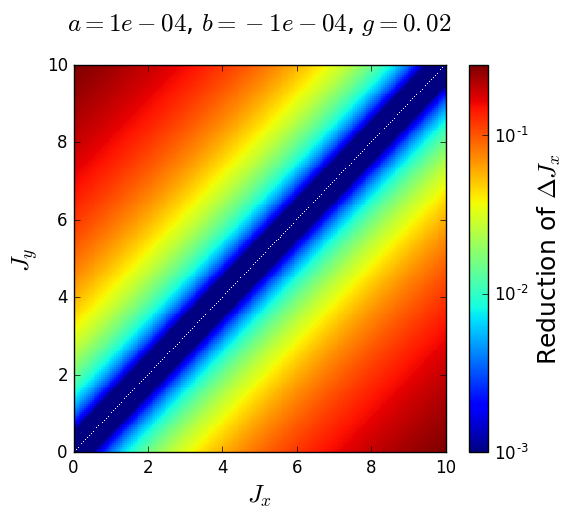

In [123]:
###################################################
a= 1e-4
b= -a
# a = 1.64e-4  ;  b = -1.16e-4
# a = 2*a
g= 0.02
jmax= 10
jx = np.linspace(0,jmax,200)
jy = jx
JX,JY = np.meshgrid(jx,jy)

F = octu_leb(JX,JY,a,b,g)
vmin = np.min(F)
vmax = np.max(F) 
# vmax = 1.0
vmin = 10**(int(np.log10(vmax * 1e4)-7))
plt.figure()
plt.pcolor(JX,JY,F,norm =LogNorm(vmin=vmin,vmax=vmax))
plt.colorbar(label=r'Reduction of $\Delta J_x$')
plt.title(r"$a=%.0e$, $b=%.0e$, $g=%.2f$"%(a,b,g)+'\n')
plt.xlabel(r'$J_x$')
plt.ylabel(r'$J_y$')
plt.savefig("03_Plots/DACTX_JxJy_a=%.0e_b=%.0e_g=%.0e.eps"%(a,b,g))

In [115]:
print(int(np.log10(0.2 * 1e4))-4)

-1


# Expected above to get a dependence like J_z^2
#### It does not behave as assumed
#### Must try with Qs = 0 ?

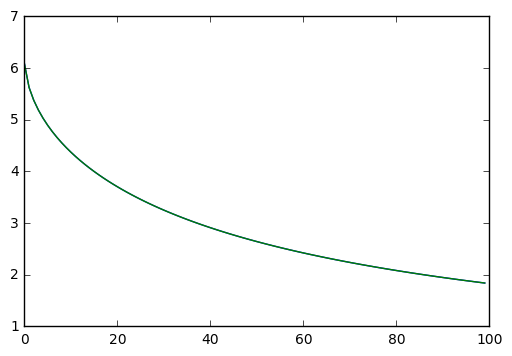

In [180]:
a = np.linspace(0.001,1,100)

f1 = 2*np.pi / (1+a+np.sqrt(a*(1+a)))
f2 = 2*(np.pi - a*np.pi/np.sqrt(a*(1+a)))
plt.plot(f1)
plt.plot(f2)

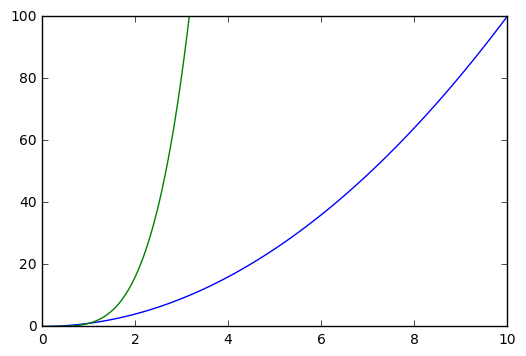

In [181]:
plt.figure()
plt.plot(Js,Js**2)
plt.plot(np.sqrt(Js),Js**2)

In [32]:
x = np.arange(10)
np.cumsum(x)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

# expectation with many kicks

In [205]:
# http://www.dummies.com/education/math/business-statistics/how-to-calculate-the-variance-and-standard-deviation-in-the-uniform-distribution/

D = 5e-2
turns = 1000
sig = D/np.sqrt(3)
growth = turns*sig**2*0.5
print(growth)

0.416666666667


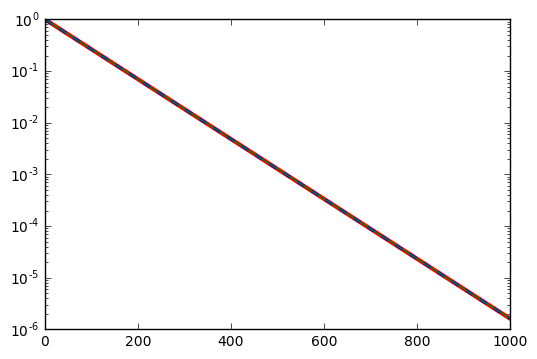

In [212]:
Nt = 100
tau1 = 100
tau2 = 300
tautot = (tau1+tau2)/(tau1*tau2)
t= np.linspace(0,1000,Nt)
x1 = 1*np.exp(-t/tau1)*np.exp(-t/tau2)
x2 = 1*np.exp(-t/tau1-t/tau2)
x3 = 1*np.exp(-t/tautot)
plt.figure()
plt.semilogy(t,x1,'r',lw =3)
plt.semilogy(t,x2,'b--',lw=2)
plt.semilogy(t,x2,'g',lw=1)

# New distribution

In [10]:
pi2= 2*np.pi
def dist(x,p,k):
    return 1/pi2 * np.exp(-x**2*0.5) * np.exp(-(p-k)**2*0.5)

def distJphi(phi,A,k):
    return dist(A*np.cos(phi),A*np.sin(phi),k)

/home/sfuruset/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:48: RuntimeWarning: overflow encountered in exp


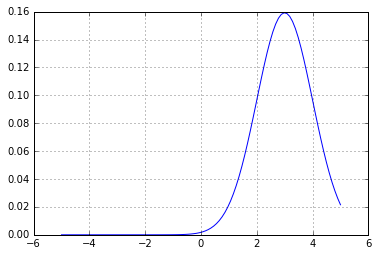

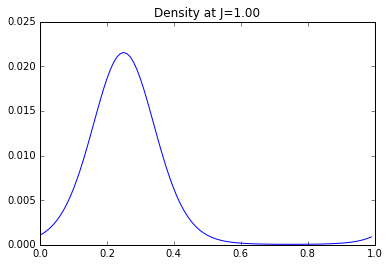

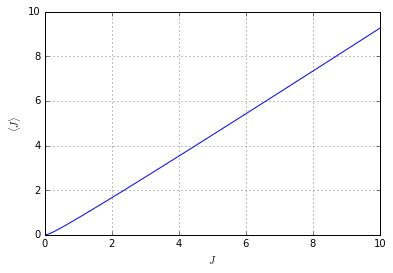

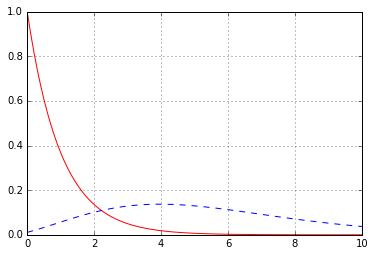

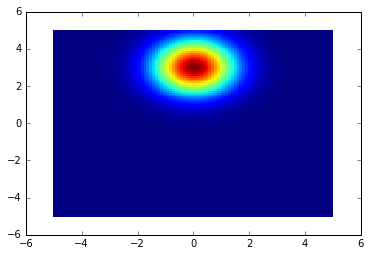

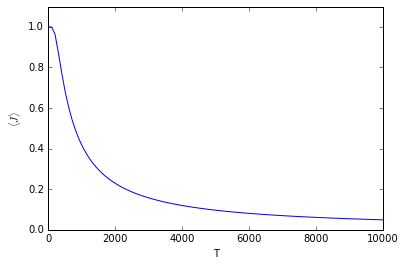

In [76]:
N=100
x = np.linspace(-5,5,N)
k=3

plt.figure()
plt.plot(x,dist(0,x,k))
plt.grid(True)

J = np.linspace(0,10,N)
A = np.sqrt(2*J)
phi = np.linspace(0,pi2,N,endpoint=False)
avgP = np.zeros_like(J)
distJ = np.zeros_like(J)


#########
plt.figure()
plt.plot(phi/pi2,distJphi(phi,1,k))
plt.title('Density at J=%.2f'%1)


########
for i in range(N):
#     avgJ[i] = integrate.quad(distJphi,0,pi2,args=(np.sqrt(2*J[i]),k))[0]
    distJ[i]= np.sum(distJphi(phi,A[i],k))/N*pi2
    avgP[i] = np.sum(A[i]*np.sin(phi)*distJphi(phi,A[i],k))/np.sum(distJphi(phi,np.sqrt(2*J[i]),k))
plt.figure()
plt.plot(J,0.5*(avgP**2))
plt.xlabel(r'$J$')
plt.ylabel(r'$\langle J \rangle$')
plt.grid(True)

plt.figure()
plt.plot(J,np.exp(-J),'r')
plt.plot(J,distJ,'b--')
plt.grid(True)


X,P = np.meshgrid(x,x)
plt.figure()
plt.pcolor(X,P,dist(X,P,k))

#########
a = 1e-3
T = np.linspace(1,10000,100)
r = 1/(T*a)
plt.figure()
plt.plot(T, 1-r/(np.exp(r)-1) )
plt.ylim(0,1.1)
plt.xlabel('T')   ; plt.ylabel(r'$\langle J \rangle$')
# plt.xlim(0,10)

# Model assumes small tune shifts, that remain fixed

In [59]:
Qp=10
sigdpp = 1.129e-4
dMU = np.arange(4)*2*np.pi*Qp*sigdpp

dMU = np.arange(6)*2*np.pi*1e-3
print('Chromaticity',dMU)
print('sin(dMU)',np.sin(dMU))
print('cos(dMU)',np.cos(dMU))

Chromaticity [ 0.          0.00628319  0.01256637  0.01884956  0.02513274  0.03141593]
sin(dMU) [ 0.          0.00628314  0.01256604  0.01884844  0.0251301   0.03141076]
cos(dMU) [ 1.          0.99998026  0.99992104  0.99982235  0.99968419  0.99950656]
